In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

%matplotlib widget

#### Tentativi di creare network

##### Metodo 1: grafo diretto
`nx.scale_free_graph` si rifà a un paper di [Bollobás et al., 2003](http://jenniferchayes.com/Papers/dirSCgrph.pdf).

Crea una rete diretta a partire da quattro parametri, $\alpha$, $\beta$, $\gamma$, $\delta_{in}$ e $\delta_{out}$, e dal paper so che la distributione degli in-degree è legge di potenza, $\propto deg^{-k}$, con
$$k = 1+\frac 1 {c_1} \qquad \qquad c_1=\frac{\alpha+\beta}{1+\delta_{in}(\alpha+\gamma)}$$
Idem scambiando $\alpha$ con $\gamma$ per gli outdegree.

Questo è un grafo diretto e non so cosa succede trasformandolo brutalmente in indiretto

In [414]:
n=10000
alpha = 0.85/2
gamma = alpha
beta = 1-alpha-gamma
print(alpha,beta,gamma)
c1 = (alpha+beta)
distribution_gamma = 1+1/c1
print(distribution_gamma)

0.425 0.14999999999999997 0.425
2.739130434782609


In [415]:
DG = nx.scale_free_graph(n=n,alpha=alpha,beta=beta,gamma=gamma,delta_in=0.,delta_out=0.)
G= DG.to_undirected()
G=nx.Graph(G) # toglie link ridondanti
G.remove_edges_from(nx.selfloop_edges(G)) # toglie self-loops, e anche questo modifica la distribuzione di grado
G.edges(0)

EdgeDataView([(0, 1), (0, 9), (0, 29), (0, 41), (0, 82), (0, 83), (0, 88), (0, 91), (0, 111), (0, 158), (0, 102), (0, 222), (0, 258), (0, 274), (0, 302), (0, 320), (0, 357), (0, 363), (0, 372), (0, 75), (0, 469), (0, 2), (0, 526), (0, 532), (0, 602), (0, 604), (0, 608), (0, 612), (0, 156), (0, 374), (0, 810), (0, 825), (0, 547), (0, 879), (0, 883), (0, 649), (0, 928), (0, 932), (0, 998), (0, 1028), (0, 1052), (0, 1113), (0, 1122), (0, 1209), (0, 1282), (0, 1327), (0, 1379), (0, 1387), (0, 23), (0, 1489), (0, 103), (0, 1651), (0, 1660), (0, 318), (0, 1741), (0, 1772), (0, 1039), (0, 314), (0, 228), (0, 1849), (0, 1856), (0, 3), (0, 934), (0, 2026), (0, 252), (0, 2237), (0, 2286), (0, 2325), (0, 618), (0, 2694), (0, 2695), (0, 2827), (0, 2858), (0, 2866), (0, 3006), (0, 3189), (0, 3213), (0, 3234), (0, 3514), (0, 3693), (0, 3695), (0, 3699), (0, 3753), (0, 3958), (0, 2987), (0, 4141), (0, 4278), (0, 4281), (0, 4363), (0, 1311), (0, 4423), (0, 138), (0, 2835), (0, 26), (0, 4559), (0, 4558

In [416]:
len(list(nx.strongly_connected_components(DG)))

9998

In [417]:
len(list(nx.connected_components(G))) ## c'è una sola componente connessa (tutti collegati)

1

In [418]:
degrees = [d for n,d in G.degree()]
deg, counts = np.unique(degrees,return_counts=True)
deg,counts #ci sono ~250 nodi con grado 0

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  29,  30,  31,  32,  33,  35,  38,  40,  43,  48,  49,  50,
         57,  59,  62,  68,  81,  94, 114, 118, 137, 190, 212, 225, 458]),
 array([6336, 1726,  694,  359,  219,  140,  113,   73,   54,   41,   38,
          21,   22,   12,   23,   17,    7,   11,   13,    5,    3,    7,
           6,    7,    3,    4,    4,    5,    3,    5,    1,    1,    4,
           2,    2,    1,    2,    2,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1]))

Se provo a plottare la distribuzione di grado di quello diretto, a occhio mi sembra che si sia spostato verso esponente più basso, forse si può prevedere come diventa la distribuzione passando da grafo diretto a indiretto?

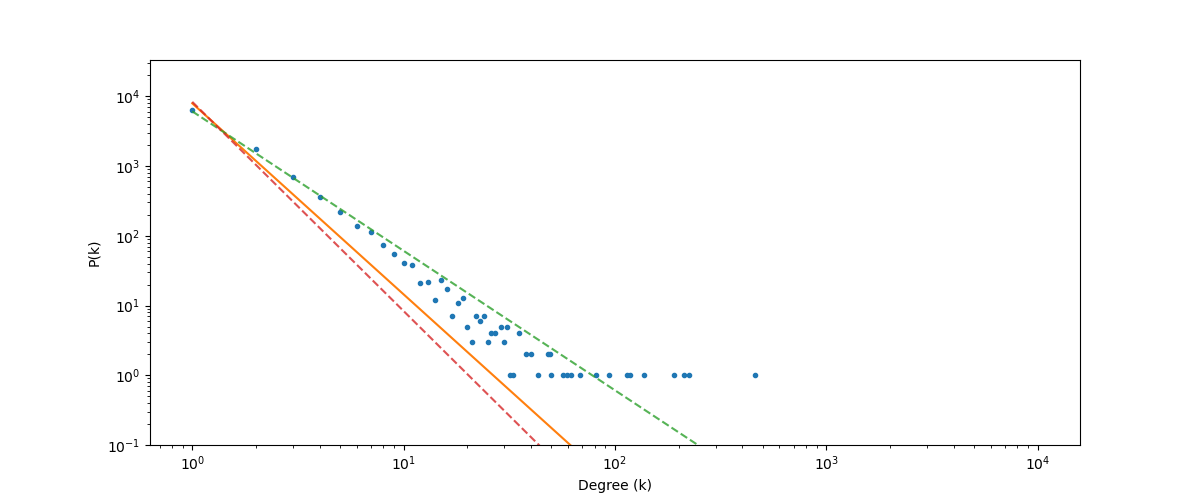

In [419]:
plt.close('all')
plt.figure(figsize=(12,5))
plt.yscale('log')
plt.xscale('log')
plt.plot(deg,counts,'.',label='Degree distribution in the actual graph')

deg_probs = np.arange(1,n-1,dtype=float)**(-distribution_gamma)
deg_probs =  deg_probs/(deg_probs.sum())
plt.plot(np.arange(1,n-1),deg_probs*n,label=f'Expected distribution, $\\gamma={distribution_gamma:.3f}$')

#plt.plot(np.arange(1,n-1),deg_probs[1:]*n,label=f'Expected distribution, $\\gamma={gamma}$')#*90)


gamma_2 = 2
deg_probs_2 = np.arange(1,n-1,dtype=float)**(-gamma_2)
deg_probs_2 =  deg_probs_2/(deg_probs_2.sum())
plt.plot(np.arange(1,n-1),deg_probs_2*n,'--', label='Reference distribution, $\\gamma=2$',alpha=0.8)#*90)


gamma_3 = 3
deg_probs_3 = np.arange(1,n-1,dtype=float)**(-gamma_3)
deg_probs_3 = deg_probs_3/(deg_probs_3.sum())
plt.plot(np.arange(1,n-1),deg_probs_3*n,'--',label='Reference distribution, $\\gamma=3$',alpha=0.8)#*90)

plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.ylim(bottom=0.1)
plt.show()
plt.legend()

##### Metodo 2: da lista di valori attesi per i gradi
`nx.expected_degree_graph` crea un grafo data una lista di gradi attesi per ciascun nodo; il problema è che per rispettare la distribuzione, lascia molti nodi non connessi alla rete, quindi vorrebbe dire avere numero di nodi connessi variabile.

`nx.configuration_model` fa una cosa simile

In [420]:
n= 1000
gamma = 2.5
deg_probs = np.arange(1,n-1,dtype=float)**(-gamma)
deg_probs = np.concat(( np.array([0.]) , deg_probs/(deg_probs.sum()) ))

deg_extracted = np.random.multinomial(n,deg_probs) ## estraggo a caso dalla distribuzione i gradi
exp_degs = []
for deg,num in enumerate(deg_extracted):
  for i in range(num):
    exp_degs.append(deg)
exp_degs=exp_degs[::-1]

G = nx.expected_degree_graph(exp_degs,selfloops=False)

## Altre due funzioni che fanno una cosa simile, ed hanno lo stesso problema
# G = nx.configuration_model(exp_degs,create_using=nx.Graph)
# G.remove_edges_from(nx.selfloop_edges(G)) # toglie self-loops, e anche questo modifica la distribuzione di grado

# G = nx.havel_hakimi_graph(exp_degs,create_using=nx.Graph)

In [421]:
type(G) #grafo non diretto

networkx.classes.graph.Graph

In [ ]:
degrees = [d for n,d in G.degree()]
deg, counts = np.unique(degrees,return_counts=True)
deg,counts #ci sono ~250 nodi con grado 0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 20, 32,
        50]),
 array([321, 302, 204,  89,  26,  21,  10,   8,   4,   1,   3,   4,   1,
          1,   2,   1,   1,   1]))

In [ ]:
#ci sono tante componenti connesse, quella più grande di ~600 nodi
sorted([len(i) for i in list(nx.connected_components(G))] ,reverse=True)

[568,
 6,
 6,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

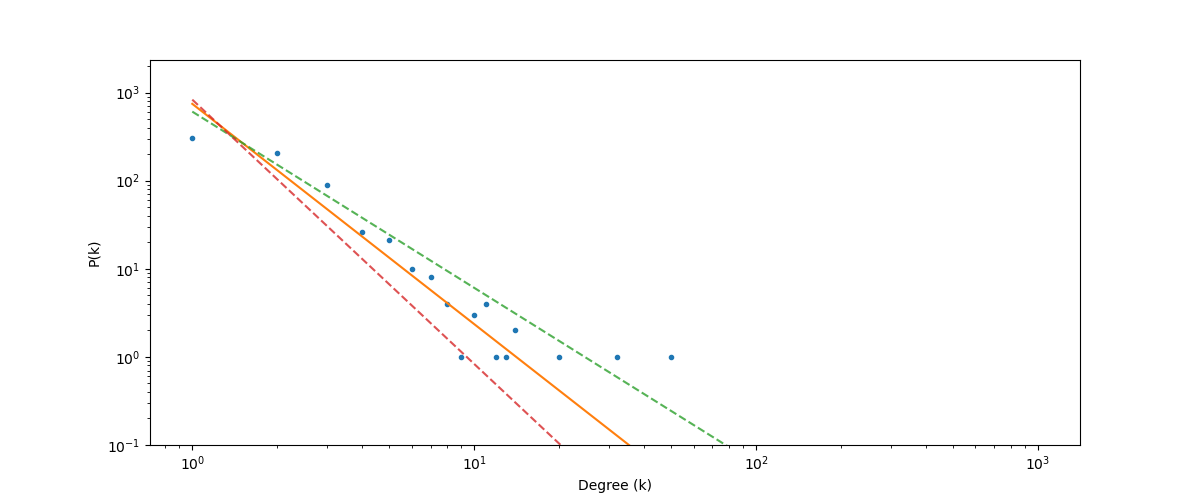

In [424]:
plt.close('all')
plt.figure(figsize=(12,5))
plt.yscale('log')
plt.xscale('log')
plt.plot(deg,counts,'.',label='Degree distribution in the actual graph')
plt.plot(np.arange(1,n-1),deg_probs[1:]*n,label=f'Expected distribution, $\\gamma={gamma}$')#*90)


gamma_2 = 2
deg_probs_2 = np.arange(1,n-1,dtype=float)**(-gamma_2)
deg_probs_2 =  deg_probs_2/(deg_probs_2.sum())
plt.plot(np.arange(1,n-1),deg_probs_2*n,'--', label='Reference distribution, $\\gamma=2$',alpha=0.8)#*90)


gamma_3 = 3
deg_probs_3 = np.arange(1,n-1,dtype=float)**(-gamma_3)
deg_probs_3 = deg_probs_3/(deg_probs_3.sum())
plt.plot(np.arange(1,n-1),deg_probs_3*n,'--',label='Reference distribution, $\\gamma=3$',alpha=0.8)#*90)

plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.ylim(bottom=0.1)
plt.show()
plt.legend()

In [2]:
import os
import json

#### Caricamento da array numpy

nets.npy contiene array numpy delle edgelist ad ogni iterazione

In [2]:
import glob

In [29]:
beta = 2.
varc=1.
outputdir = os.path.join(".","outputs","update2",f"beta={beta}_varc={varc}")

# glob trova tutti i path che matchano la sorta di regex dato
# sono tutte le sottocartelle di simulazioni con fissate beta e varc
# a una certa faremo loop su tutte per avere i valori che ci servono
filespaths=glob.glob(outputdir+'/[0-9][0-9]_*')

nets = np.load(filespaths[0]+'/nets.npy')
mus = np.load(filespaths[0]+'/mus.npy')
sigma2s = np.load(filespaths[0]+'/sigma2s.npy')

In [30]:
G0 = nx.from_edgelist(nets[0],create_using=nx.DiGraph)
for i in G0.nodes:
  (G0.nodes)[i]['mu'] = mus[0][i]
  (G0.nodes)[i]['sigma2']= sigma2s[0][i]

In [31]:
G = nx.from_edgelist(nets[-1],create_using=nx.DiGraph)
for i in G.nodes:
  (G.nodes)[i]['mu'] = mus[-1][i]
  (G.nodes)[i]['sigma2']= sigma2s[-1][i]

In [32]:
nx.attribute_assortativity_coefficient(G0,'mu')

-0.0026998411725024547

In [33]:
nx.attribute_assortativity_coefficient(G,'mu')

-0.002375483780807012

In [34]:
len(G.nodes())

1000

In [37]:
sorted([len(i) for i in nx.strongly_connected_components(G)],reverse=True)[:5]

[569, 1, 1, 1, 1]

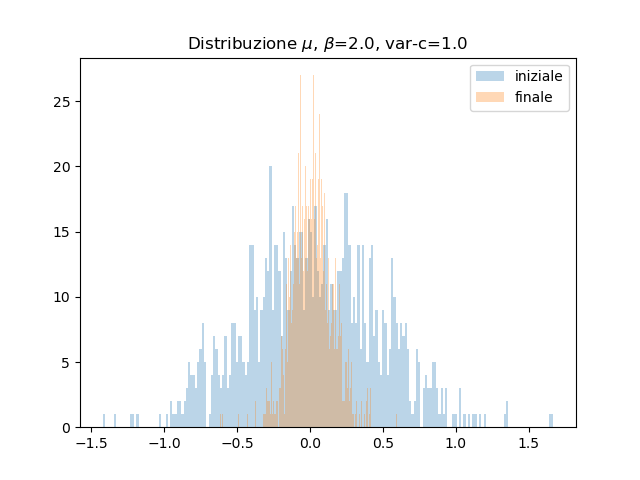

In [49]:
plt.close('all')
plt.title(f'Distribuzione $\\mu$, $\\beta$={beta}, var-c={varc}')
plt.hist(mus[0],bins=200,alpha=0.3,label='iniziale')
plt.hist(mus[-1],bins=200,alpha=0.3,label='finale')
plt.legend()
plt.show()